In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sys
import pandas as pd

sys.path.append('./subroutines/')
import pices

adir_data = './data/'

C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [ ]:
#result = p.granule_search(dataset_id='PODAAC-GHV20-2PO61', bbox='-160,40,-120,62',start_time='2019-03-01T01:30:00Z',end_time='2019-03-05T00:00:00Z',start_index='1')
#bbox west, south, east, north

In [5]:
ds=xr.open_dataset('.\data\cur.mnmean.nc')
ds['spd']=np.sqrt(ds.u**2+ds.v**2)

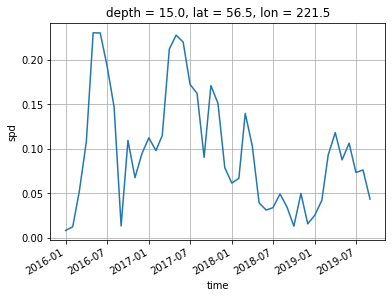

In [31]:
ds2=ds.sel(lat=slice(40,62),lon=slice(200,260)).isel(time=0)
#ds2.spd.plot()
#plt.grid()
ds.spd.sel(lat=56,lon=221,method='nearest').sel(time=slice('2016-01-01','2019-12-31')).plot()
plt.grid()

In [ ]:
dataset_id =   #VIIRS orbital SST
gresult = p.granule_search(dataset_id=dataset_id,
                           start_time=start_time,
                           end_time=end_time,
                           items_per_page='100')
urls = putil.PodaacUtils.mine_opendap_urls_from_granule_search(gresult)
urls_sst = [w[:-5] for w in urls]  #remove html from urlsurls_sst = [w.replace('-tools.jpl.nasa.gov/drive/files/', '-opendap.jpl.nasa.gov/opendap/') for w in urls_sst]
print('num files:',len(urls_sst))


In [38]:
file='https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/2019/030/20190130090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
ds = xr.open_dataset(file)
ds = ds.sel(lat=slice(50,62),lon=slice(-160,-120),time)
ds2 = ds.assign_coords(lon=np.mod(ds['lon'], 360)).sortby('lon')
ds2

C:\Users\gentemann\Miniconda3\envs\satenv\lib\site-packages\xarray\coding\times.py:211: FutureWarning: the 'box' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'box'
  result = pd.to_timedelta(num_timedeltas, unit=units, box=False)


<xarray.Dataset>
Dimensions:           (lat: 1201, lon: 4001, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2019-01-30T09:00:00
  * lat               (lat) float32 50.0 50.01 50.02 50.03 ... 61.98 61.99 62.0
  * lon               (lon) float32 200.0 200.01 200.02 ... 239.98999 240.0
Data variables:
    analysed_sst      (time, lat, lon) float32 278.344 278.349 ... nan nan
    analysis_error    (time, lat, lon) float32 0.38 0.38 0.38 ... nan nan nan
    mask              (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0
    sea_ice_fraction  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    dt_1km_data       (time, lat, lon) timedelta64[ns] NaT NaT NaT ... NaT NaT
Attributes:
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:

ValueError: too many values to unpack (expected 2)

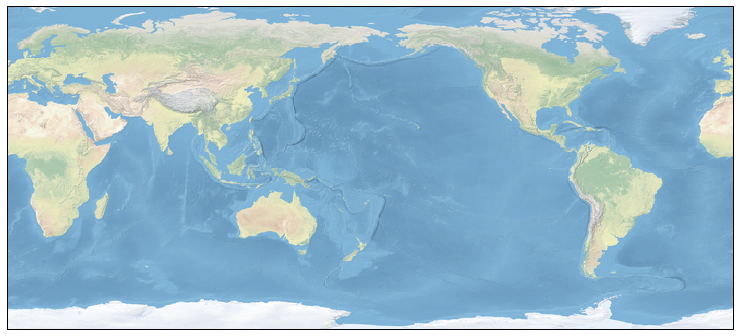

In [39]:
plt.figure(figsize=(13,6.2))
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))#, 
#                                               min_latitude=-80, max_latitude=80))
ax.background_img(name='ne_shaded', resolution='low')
#ds2=ds.sel(lat=slice(50,62),lon=slice(-160,-120)).isel(time=0)
#(ds2.analysed_sst-273.15).plot(ax=ax,vmin=4,vmax=9,cmap='gist_rainbow')
ax.set_extent([1,-1,-80,80])
mm = ax.pcolormesh(ds2.lon,\
                   ds2.lat,\
                   ds2.analysed_sst-273.15,vmin=4, vmax=9, transform=ccrs.PlateCarree(),cmap='gist_rainbow' )
ax.coastlines(resolution='10m');
plt.title('LME regions')
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='LME region number')
plt.savefig(dir_figs+'/LME_all_regions_mask_be.png', dpi=100)
